###  Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pydot

###  Importing Company_Data data

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
data['High']= data.Sales.map(lambda x: 1 if x>7.5 else 0)

### converting categorical data


In [5]:
data['ShelveLoc']=data['ShelveLoc'].astype('category')
data['Urban']=data['Urban'].astype('category')
data['US']=data['US'].astype('category')

In [6]:
data.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
High              int64
dtype: object

###  converting category to numeric data

In [7]:
data['ShelveLoc']=data['ShelveLoc'].cat.codes
data['Urban']=data['Urban'].cat.codes
data['US']=data['US'].cat.codes

In [8]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc         int8
Age              int64
Education        int64
Urban             int8
US                int8
High             int64
dtype: object

In [9]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


### Model building

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
X = data.iloc[:,1:11]
Y = data.iloc[:,11]

In [12]:
print(X)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [13]:
print(Y)

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64


In [14]:
data['High'].unique()

array([1, 0], dtype=int64)

In [15]:
data.High.value_counts()

0    202
1    198
Name: High, dtype: int64

###  Splting data into trainig and testing data set

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 40)

###  Build decision tree classifire using entropy criteria

In [17]:
model = DecisionTreeClassifier(criterion ='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

###  plot the decission tree

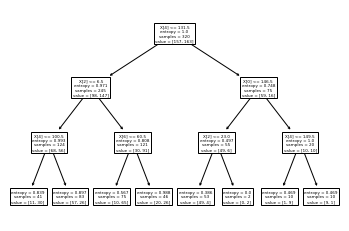

In [21]:
tree.plot_tree(model);

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [24]:
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
## predict the accuracy 
pred = model_gini.predict(X_test)
np.mean(pred == Y_test)

0.6875

In [33]:
# Decision tree as regration 
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [35]:
array = data.values
x = array[:,1:11]
y = array[:,11]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state =50)

In [43]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [44]:
pred = model.predict(x_test)
pred

array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [45]:
# find the accuracy
model.score(x_test,y_test)

-0.3277192982456141

###  Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

* Undergrad : person is under graduated or not
* Marital.Status : marital status of a person
* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
* Work Experience : Work experience of an individual person
* Urban : Whether that person belongs to urban area or not



In [76]:
file = pd.read_csv('Fraud_check.csv')

In [77]:
file.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [78]:
file1 = file.rename({'Marital.Status':'M','Taxable.Income':'income','City.Population':'population','Work.Experience':'work'},axis = 1)

In [79]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Undergrad   600 non-null    object
 1   M           600 non-null    object
 2   income      600 non-null    int64 
 3   population  600 non-null    int64 
 4   work        600 non-null    int64 
 5   Urban       600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [80]:
file1.head()

,Undergrad,M,income,population,work,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [81]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
file1= pd.get_dummies(file1,columns=['Undergrad','M','Urban'],drop_first = True)
file1.head()

,income,population,work,Undergrad_YES,M_Married,M_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [82]:
#Creating new cols TaxInc for Risky and Good
file1["Tax"] = pd.cut(file1["income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [83]:
#Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [84]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
file1 = pd.get_dummies(file1,columns = ["Tax"],drop_first=True)

In [87]:
file1.tail(10)

,income,population,work,Undergrad_YES,M_Married,M_Single,Urban_YES,Tax_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [88]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [90]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(file1.iloc[:,1:])
df_norm.tail(10)

,population,work,Undergrad_YES,M_Married,M_Single,Urban_YES,Tax_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [94]:
x = df_norm.drop(['Tax_Good'], axis=1)
y = df_norm['Tax_Good']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [107]:
model_gini1 = DecisionTreeRegressor()
model_gini1.fit(x_train,y_train)

DecisionTreeRegressor()

In [108]:
# prddiction and computing the accuracy
pred = model_gini1.predict(x_test)
np.mean(pred== y_test)

0.65

In [111]:
# Random forest classification 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [112]:
num_trees = 100
max_featues = 3

In [114]:
kfold =KFold(n_splits =10, random_state = 7,shuffle=True)

In [118]:
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_featues)

In [119]:
results = cross_val_score(model,x,y,cv =kfold)

In [120]:
print(results.mean())

0.7416666666666666
